# Dealing messing values:
## Different Techninque to handle NA values:
- Delete all the messing values
- Replace them with the mean, median or mode
- Build a ML model that predicts the NA values
## Handling messing values in Titanic dataset from kaggle
we will handle messing values in the [Titanic dataset](https://www.kaggle.com/c/titanic) 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

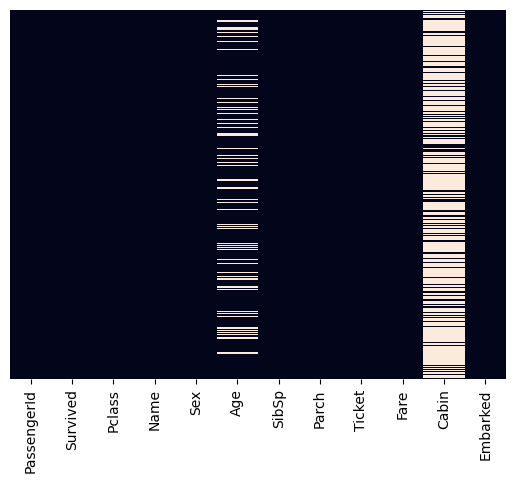

In [83]:
# As we see there is a lot of messing values in age and cabin columns
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

### EDA on age column
we will deal with messing values in the age column and since it's an interval data we will replace it with the median, but before that we should do some EDA in order to replace it with the right median value

<Axes: xlabel='Survived', ylabel='count'>

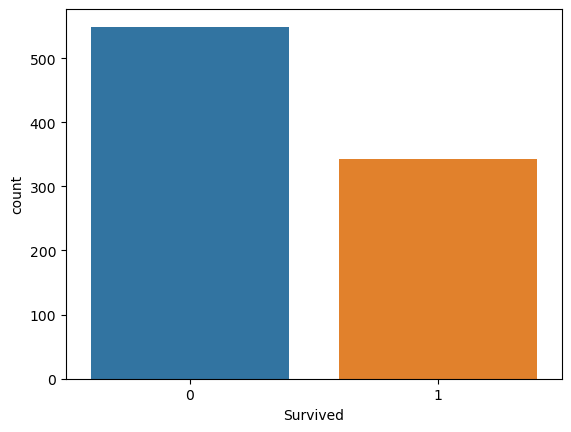

In [84]:
# how much who survived?
# 0: not survived 
# 1: survived
sns.countplot(data=data, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

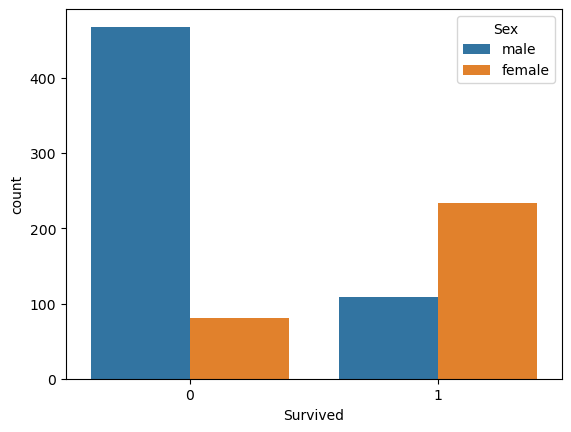

In [85]:
# But now let's see how much man and women survived and not survived
sns.countplot(data=data, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

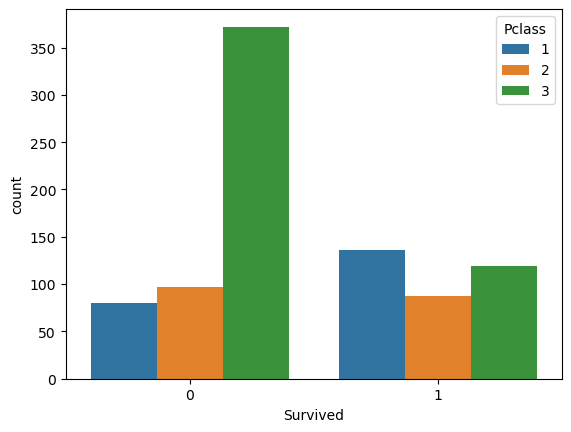

In [86]:
# Now let's see who survived based on their class
sns.countplot(data=data, x='Survived', hue='Pclass')

### Data Cleaning:

<Axes: xlabel='Pclass', ylabel='Age'>

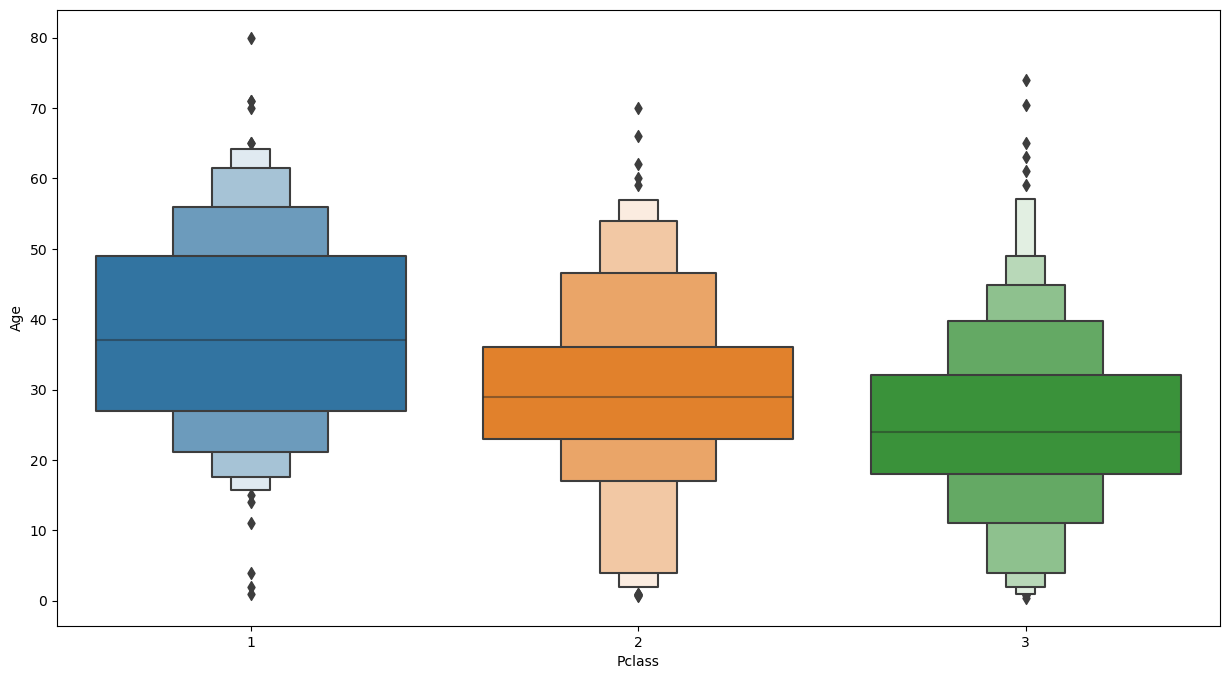

In [87]:
plt.figure(figsize=(15, 8))
sns.boxenplot(data=data, x='Pclass', y='Age')

In [88]:
def replace_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        if pclass == 2:
            return 28
        if pclass == 3:
            return 22
    else:
        return age

In [89]:
data['Age'] = data[['Age', 'Pclass']].apply(func=replace_age, axis=1)

<Axes: >

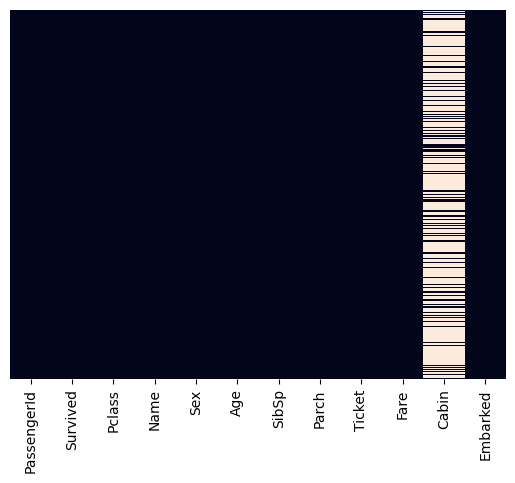

In [90]:
sns.heatmap(data=data.isna(), yticklabels=False, cbar=False)

As we see there are no more null values in the Age column, as we replaced it with the median value depending on if it is in class 1 or 2 or 3

In [91]:
# For the Cabin column we will just drop it since I don't have much domain knowledge
data.drop('Cabin', axis=1, inplace=True)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [93]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [94]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [95]:
data = pd.concat([data,sex,embark],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[150,  13],
       [ 33,  71]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8277153558052435